# **Import Libraries**

In [496]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import warnings

import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **Dataset**

In [497]:
data=pd.read_csv('https://raw.githubusercontent.com/riskykrnawan/Praktikum_KB/main/Posttest_KB_2/employee_data.csv')

In [498]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [499]:
# tipe data
data.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

# **Data Cleaning**

Berikut ini adalah jumlah null di dalam dataset dari setiap attribut

In [500]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

- Median untuk nilai Integer.
- Mean untuk nilai Desimal.
- Modus untuk nilai tulisan 

##### Namun terdapat kesalahan dalam df.info(), meskipun kolom tersebut sebenarnya int64, kolom tersebut akan diidentifikasi sebagai float64 karena terdapat nilai null di dalamnya, jadi sebenarnya avg_monthly_hrs, n_project, tenure, dan beberapa attribut lain aslinya berupa int64, jadi itulah alasan saya tetap menggunakan mode median untuk nilai tsb.

In [501]:
medianImputer = SimpleImputer(strategy='median')
meanImputer = SimpleImputer(strategy='mean')
modusImputer = SimpleImputer(strategy='most_frequent')
data["avg_monthly_hrs"] = medianImputer.fit_transform(data[["avg_monthly_hrs"]])
data['department'] = data['department'].fillna('other')
data["filed_complaint"] = medianImputer.fit_transform(data[["filed_complaint"]])
data["last_evaluation"] = meanImputer.fit_transform(data[["last_evaluation"]])
data["n_projects"] = medianImputer.fit_transform(data[["n_projects"]])
data["recently_promoted"] = medianImputer.fit_transform(data[["recently_promoted"]])
data["satisfaction"] = meanImputer.fit_transform(data[["satisfaction"]])
data["tenure"] = meanImputer.fit_transform(data[["tenure"]])

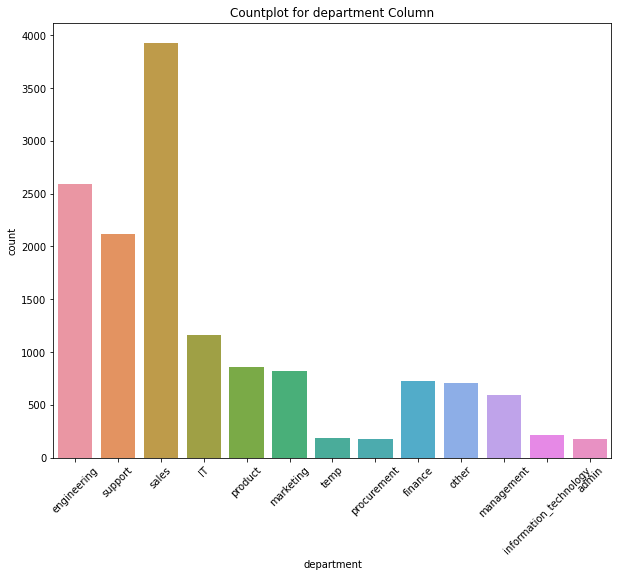

In [502]:
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'department', data = data)
plt.title("Countplot for department Column")
plt.xticks(rotation=45)
plt.show()

berikut ini setelah data di cleaning

In [503]:
data.isna().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

Bersihkan data duplikat


In [504]:
# DATA DUPLIKAT
data.duplicated().sum()
data[data.duplicated()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
1804,136.0,temp,1.0,0.718477,2.0,1.0,low,0.621295,Employed,3.497228
2558,126.0,temp,1.0,0.718477,2.0,1.0,low,0.621295,Left,3.497228
3004,69.0,temp,1.0,0.718477,2.0,1.0,low,0.621295,Employed,3.497228
3026,101.0,temp,1.0,0.718477,1.0,1.0,medium,0.621295,Employed,3.497228
4051,100.0,temp,1.0,0.718477,1.0,1.0,medium,0.621295,Employed,3.497228
4864,84.0,temp,1.0,0.718477,1.0,1.0,medium,0.621295,Employed,3.497228
5023,125.0,temp,1.0,0.718477,2.0,1.0,low,0.621295,Employed,3.497228
5504,85.0,temp,1.0,0.718477,2.0,1.0,low,0.621295,Employed,3.497228
6037,76.0,temp,1.0,0.718477,2.0,1.0,medium,0.621295,Employed,3.497228
6147,85.0,temp,1.0,0.718477,2.0,1.0,low,0.621295,Employed,3.497228


In [505]:
data.drop_duplicates(inplace=True)

berikut setelah data duplikat dibersihkan

In [506]:
data[data.duplicated()].sum()

avg_monthly_hrs      0.0
department           0.0
filed_complaint      0.0
last_evaluation      0.0
n_projects           0.0
recently_promoted    0.0
salary               0.0
satisfaction         0.0
status               0.0
tenure               0.0
dtype: float64

mengubah tipe data dari attribut

before



In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14214 non-null  float64
 1   department         14214 non-null  object 
 2   filed_complaint    14214 non-null  float64
 3   last_evaluation    14214 non-null  float64
 4   n_projects         14214 non-null  float64
 5   recently_promoted  14214 non-null  float64
 6   salary             14214 non-null  object 
 7   satisfaction       14214 non-null  float64
 8   status             14214 non-null  object 
 9   tenure             14214 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.2+ MB


In [508]:
data['avg_monthly_hrs'] = data['avg_monthly_hrs'].astype('int64')
data['tenure'] = data['tenure'].astype('int64')

after

In [509]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14214 non-null  int64  
 1   department         14214 non-null  object 
 2   filed_complaint    14214 non-null  float64
 3   last_evaluation    14214 non-null  float64
 4   n_projects         14214 non-null  float64
 5   recently_promoted  14214 non-null  float64
 6   salary             14214 non-null  object 
 7   satisfaction       14214 non-null  float64
 8   status             14214 non-null  object 
 9   tenure             14214 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 1.2+ MB


# **Membuat feature dan target**

In [510]:
# Convert 'Left' for 0 and 'Employed' for 1
Y = np.where(data['status'].values == 'Left', 0, 1)

# dropping the target column and create the matrix of features
x = data.drop(['status'], axis=1)

# **Analisis**

## **Categorial**

**ENCODING:**

Perlu encoding untuk beberapa kolom categorical
Kolom yang akan diencoding:
1. department
2. filed_complaint (sudah bernilai 0 dan 1, jadi tidak perlu dilakukan encoding)
3. recently_promoted (sudah bernilai 0 dan 1, jadi tidak perlu dilakukan encoding)
4. salary

In [511]:
# make all categorial columns to separeted columns
x = pd.get_dummies(x, drop_first=True)
x.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_admin,department_engineering,department_finance,...,department_management,department_marketing,department_other,department_procurement,department_product,department_sales,department_support,department_temp,salary_low,salary_medium
0,221,1.0,0.932868,4.0,1.0,0.829896,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,232,1.0,0.718477,3.0,1.0,0.834544,2,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,184,1.0,0.788830,3.0,1.0,0.834988,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,1.0,0.575688,4.0,1.0,0.424764,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,1.0,0.845217,3.0,1.0,0.779043,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## **Numerical**

**Standarisasi:**

Akan dilakukan standarisasi untuk kolom ini:
1. avg_monthly_hrs
2. last_evaluation
3. n_projects
4. satisfaction
5. tenure


In [512]:
num_cols=['avg_monthly_hrs','last_evaluation','n_projects','satisfaction','tenure']
scaler = StandardScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])
x.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_admin,department_engineering,department_finance,...,department_management,department_marketing,department_other,department_procurement,department_product,department_sales,department_support,department_temp,salary_low,salary_medium
0,0.412541,1.0,1.309746e+00,0.176747,1.0,0.837179,1.036908,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.629014,1.0,6.782516e-16,-0.623343,1.0,0.855832,-1.026071,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,-0.315597,1.0,4.297978e-01,-0.623343,1.0,0.857613,-0.338411,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.117350,1.0,-8.723175e-01,0.176747,1.0,-0.788740,-1.026071,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.963564,1.0,7.742782e-01,-0.623343,1.0,0.633090,-0.338411,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# **Train Test Split**


In [513]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = .3)

# **DecisionTree**

In [514]:
clf = DecisionTreeClassifier()
model = clf.fit(x_train, y_train)

In [515]:
DecisionTreeClassifier(
    class_weight=None, 
    criterion='gini', 
    max_depth=None, 
    max_features=None, 
    max_leaf_nodes=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    min_weight_fraction_leaf=0.0, 
    random_state=None, 
    splitter='best'
    )

DecisionTreeClassifier()

In [516]:
model_pred = model.predict(x_test)
acc_model = accuracy_score(y_test, model_pred)
print("Akurasi algoritma Decision Tree dengan default paramater :", round(acc_model,3))

Akurasi algoritma Decision Tree dengan default paramater : 0.962


In [517]:
print(metrics.confusion_matrix(y_test, model_pred))
print(metrics.accuracy_score(y_test, model_pred)*100, '%')

[[ 951   87]
 [  77 3150]]
96.15474794841735 %



# **KNN**

In [518]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train_std,y_train)

knn_pred = knn.predict(x_test_std)
acc_knn = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN dengan default paramater :", round(acc_knn,3))

Akurasi algoritma KNN dengan default paramater : 0.939


In [519]:
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)

Mencari K terbaik

In [520]:
train_accuracies

{1: 0.9996984621570008,
 2: 0.970549804000402,
 3: 0.9736656950447281,
 4: 0.9589908533520957,
 5: 0.9623077696250879,
 6: 0.9539652226354407,
 7: 0.9555734244647703,
 8: 0.9488390793044527,
 9: 0.9513518946627801,
 10: 0.9451201125741281,
 11: 0.9474319027037893,
 12: 0.9424062719871343}

In [521]:
test_accuracies

{1: 0.9502930832356389,
 2: 0.9331770222743259,
 3: 0.9479484173505276,
 4: 0.9376318874560375,
 5: 0.9460726846424384,
 6: 0.9390386869871044,
 7: 0.943728018757327,
 8: 0.9395076201641266,
 9: 0.9444314185228605,
 10: 0.9397420867526377,
 11: 0.9430246189917937,
 12: 0.94021101992966}